#                         Advertisement Analysis

Ficticious Co. is currently advertising using TV,Radio,and Newspaper. The Company would like to know how television, radio, and newspaper impact sales. The has also inquired about which outlet produces the most sales so that it can increase the ad budget. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

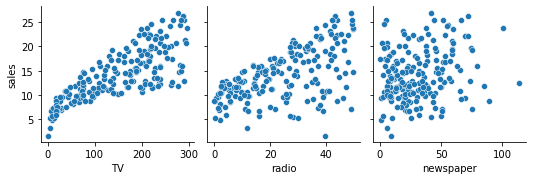

In [5]:
sns.pairplot(data, x_vars = ['TV','radio','newspaper'], y_vars='sales')

Text(0.5, 1.0, 'Correlation Matrix')

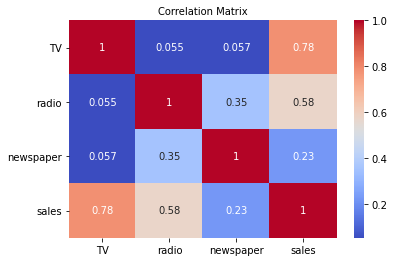

In [6]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=10)

In [7]:
x = data[['TV', 'radio','newspaper']].values

In [8]:
y = data['sales'].values

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [10]:
# print(x_train.shape)
# print(y_train.shape)
print(x_test.shape)

(60, 3)


In [11]:
from sklearn.linear_model import LinearRegression
linmod = LinearRegression()
linmod.fit(x_train,y_train) 

LinearRegression()

In [12]:
print(linmod.intercept_)

2.880255286331325


In [13]:
print(linmod.coef_) # print the coefficients for (tv,radio,and newspaper)

[0.04391531 0.20027962 0.00184368]


In [14]:
rsc = linmod.score(x_test,y_test) * 100
rsc

86.49018906637791

# Notes: 
There is a positive linear relationship with the independent variables and the dependent variable. This is great news for Ficticious company as their advertising efforts are not going to waste. We can see 86% of the target(sales) can be predicted by the input variables.

For every tv ad, sales is likely to increase by 0.04

For every radio ad, sales is likely to increase by 0.20

For every newspaper ad, sales is likely to increase by 0.001

Based on the analysis, Ficticious Co. should increase the radio ad budget as the radio is likely to yield more sales

